In [159]:
import gspread
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import datetime as dt
import numpy as np
from matplotlib.ticker import MaxNLocator

sa = gspread.service_account(
    filename="/Users/taylorcastillo/Documents/Python/keys/service_account.json")

sh = sa.open("Calorie Tracker")
wks = sh.worksheet("Form Responses 1")

df = pd.DataFrame(wks.get_all_records())

# this works
df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.date

# but this doesn't. why? I guess it is calling the date method vs the date attribute?
# df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.date()

df.sort_values('Timestamp', ascending=False)

# df["Date"] = df["Timestamp"] 
df = df.rename(columns = {"Timestamp":"Date"})


In [145]:
# pd.set_option('display.max_columns', 85)
# pd.set_option('display.max_rows', 40)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           145 non-null    object
 1   Weight         145 non-null    object
 2   Steps          145 non-null    object
 3   Net Calories   145 non-null    object
 4   Email Address  145 non-null    object
 5   Hours Slept    145 non-null    object
 6   User           145 non-null    object
dtypes: object(7)
memory usage: 8.1+ KB


In [105]:
df.head(10)

,Timestamp,Weight,Steps,Net Calories,Email Address,Hours Slept,User
0,2023-01-20,189.8,,-1000,,,T-Money
1,2023-01-19,,,-1000,,,T-Money
2,2023-01-18,192.2,,-300,,,T-Money
3,2023-01-17,191,,-500,,,T-Money
4,2023-01-16,188.8,,-500,,,T-Money
5,2023-01-15,188.4,,-680,,,T-Money
6,2023-01-14,189,,-500,,,T-Money
7,2023-01-13,189.8,,-1000,,,T-Money
8,2023-01-12,192.6,,-1000,,,T-Money
9,2023-01-11,191,,-1000,,,T-Money


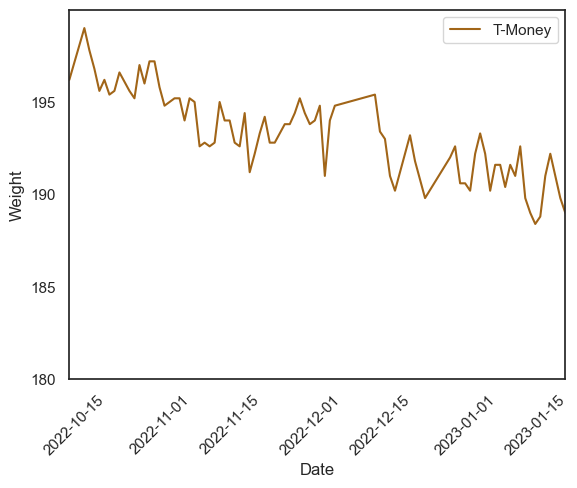

In [203]:
sns.despine()
sns.set_style('white')
sns.set_palette("BrBG")
df = df.loc[df['User'] == "T-Money"]
df = df.loc[df['Date'] > dt.date(2022,10,1)]
# df_.set_ylim(1, 70)
df_graph = sns.lineplot(
    data=df,
    x="Date", 
    y="Weight"
)
df_graph.set_ylim(180, 200)
plt.legend(labels=['T-Money'])
plt.xticks(rotation=45)
plt.yticks(range(180,200,5))
plt.xlim(dt.date(2022, 10, 14), dt.date.today());

In [65]:
df2.head(100)

,Timestamp,Weight,Steps,Net Calories,Email Address,Hours Slept,User
130,2023-01-11,191,,-1000,,,T-Money
131,2023-01-12,192.6,,-1000,,,T-Money
132,2023-01-13,189.8,,-1000,,,T-Money
133,2023-01-14,189,,-500,,,T-Money
134,2023-01-15,188.4,,-680,,,T-Money
135,2023-01-16,198.8,,-500,,,T-Money
136,2023-01-17,191,,-500,,,T-Money
137,2023-01-18,192.2,,-300,,,T-Money
